# DSC540 Project 4 - 

DePaul University  
Ilyas Ustun, PhD  
Chicago, IL  

## Rules
- Write your code under the corresponding questions where you see `# Code here`. You are encouraged to use more than one cell.
- Provide explanation in a separate Markdown formatted cell. 
- You can change the cell type by:
    - Clicking on the outer area of the cell type you want to change,
    - Go to the top, and select either Code or Markdown from the dropdown menu.
- Be concise in your explanations and conclusions.
- Write clear code and provide explanation to functions you create by using `#` comment sign.
- For built-in function and methods you use from libraries, provide a very brief explanation of what they do.
- Try to answer the questions by yourself. Use documentation from pandas, sklearn and similar libraries to solve the problem.
- If you are stuck you can use different resources. Do not find an identical project and copy paste the solutions. 
- Write your name before beginning to code.


Important:  
- **Do NOT share the solutions with other people.**
- **Do NOT share the solutions on the internet including but not limited to Github and other platforms.**
- Sign the Honor Pledge below indicating that you have agreed to these rules listed here, and any other ethical and honor rules as required by the university.



- **Deliverables:**
    1. The Python Jupyter notebook file named properly with your name. Example: dsc540_project1_john_doe.ipynb
    2. The HTML output of this code notebook names the same way. Example: dsc540_project1_john_doe.html
        - File -> Download as -> HTML   

Good Luck!

### SYED NOOR RAZI ALI

**Honor Pledge:**  
I pledge on my honor that I, **SYED NOOR RAZI ALI**, have followed the rules listed above, that I have not given or received any unauthorized assistance on this assignment. 


## Q1 [10]

A drug company would like to introduce a drug to help patients with Alzheimer's. It is desirable to estimate $θ$, the proportion of the market share that this drug will capture. 
- The company interviews 100 people and 15 of them say that they will buy the drug. (This the observed data: n=100, observed=15) $->$ likelihood
- If in the past new drugs tend to capture a proportion between say .10 and .40 of the market, and if all values in between are assumed equally likely, then $θ ∼ Unif(0.10, 0.40)$ $->$ prior

### What is the traceplot of $\theta$ using Bayesian analysis to estimate the market share for the new drug?
- Sample 10000 draws
- Plot the traceplot

In [4]:
pip install pymc3


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install arviz

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install arviz==0.10.0


  Found existing installation: arviz 0.11.2
    Uninstalling arviz-0.11.2:
      Successfully uninstalled arviz-0.11.2
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pymc3 as pm
import arviz as az

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\Users\razia\Anaconda3\lib\site-packages\theano\configdefaults.py:697: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  "DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


C:\Users\razia\Anaconda3\lib\site-packages\pymc3\sampling.py:468: FutureWarning: In an upcoming release, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  FutureWarning,
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 2 jobs)
NUTS: [theta]


Sampling 4 chains for 500 tune and 10_000 draw iterations (2_000 + 40_000 draws total) took 68 seconds.


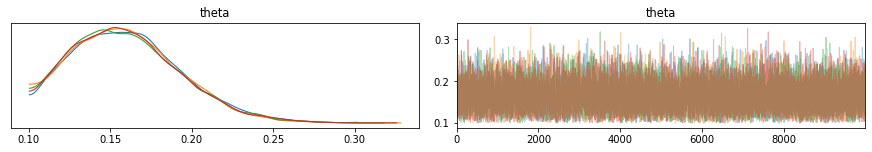

In [3]:
with pm.Model() as model:
    
    # Priors for unknown model parameters
    theta = pm.Uniform(name="theta", lower=0.10 , upper=0.40)
    
    # Likelihood
    x = pm.Binomial(name="x", p=theta, n=100, observed=15)

    # Posterior
    # draw 10000 posterior samples
    trace1 = pm.sample(draws=10000, tune=500, chains=4)
    
    # Plot the trace plot
    az.plot_trace(trace1)

### Plot the posterior distribution plot of $ \theta $
- What is the mean posterior value?

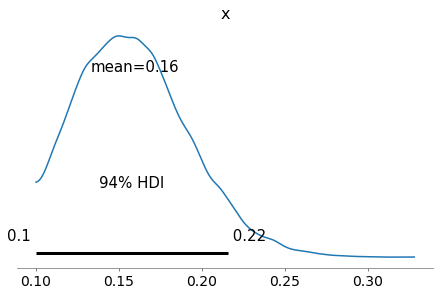

In [4]:
# Plot the posterior of trace
az.plot_posterior(trace1['theta']);


## Bayesian Network Analysis

In this part we will be analyzing medical diagnosis using Bayes Nets. The structure and the Conditional Probabability Distribution tables are shown in the figure below.

![MedicalDiagnosis](Med-diag-bnet.jpg)

- In the first few questions you will build the Bayes Net, set up the Conditional Probability Distribution tables, and associate the CPDs to the network.   
- These steps are extremely important and crucial. Make sure you do the set up correctly, as everything else depends on that.   

## Import Libraries

**Import the usual libraries for pandas and plotting, and sklearn.**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics

In [8]:
pip install pgmpy


Note: you may need to restart the kernel to use updated packages.


In [3]:
# import pgmpy
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

In [4]:
import sklearn
sklearn.__version__

'1.0.2'

### These are the packages I used

In [4]:
# Your package imports here

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import metrics
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

## Q2 [10]

**Define the model structure.** 

You need to define the network by passing a list of edges. 

In [6]:
model = BayesianModel([('Smokes', 'LungDisease'), ('LungDisease', 'ShortnessBreath'), ('LungDisease', 'ChestPain'), ('LungDisease', 'Cough'), ('Cold', 'Cough'), ('Cold', 'Fever')])

C:\Users\razia\Anaconda3\lib\site-packages\pgmpy\models\BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [7]:
model = BayesianModel([('Smokes', 'LungDisease'),           
                       ('LungDisease', 'ShortnessBreath'),            
                       ('LungDisease', 'ChestPain'),            
                       ('LungDisease', 'Cough'),                
                       ('Cold', 'Cough'),                   
                       ('Cold', 'Fever')])

## Q3 [15] 

**Define individual CPDs**
- Define the CPDs using the state names of the variables. 

In [8]:
cpd_Smokes = TabularCPD(variable='Smokes', variable_card=2, values=[[0.2], [0.8]], state_names={'Smokes' : ['T', 'F']})
print(cpd_Smokes)


cpd_LungDisease = TabularCPD(variable='LungDisease', 
                             variable_card=2, 
                             values=[[0.1009, 0.001],
                                     [0.8991, 0.999]],
                             evidence=['Smokes'],
                             evidence_card=[2],
                            state_names={'Smokes' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_LungDisease)



+-----------+-----+
| Smokes(T) | 0.2 |
+-----------+-----+
| Smokes(F) | 0.8 |
+-----------+-----+
+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [9]:
cpd_cold = TabularCPD(variable='Cold', 
                      variable_card=2, values=[[0.02], [0.98]],
                      state_names={'Cold' : ['T', 'F']})
print(cpd_cold)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+


In [10]:
cpd_cough = TabularCPD(variable='Cough', 
                       variable_card=2, 
                       values=[[0.7525, 0.505, 0.505, 0.01], 
                               [0.2475, 0.495, 0.495, 0.99]],
                       evidence=['Cold', 'LungDisease'], 
                       evidence_card=[2, 2],
                      state_names={'Cough': ['T', 'F'],
                                   'Cold': ['T', 'F'],
                                   'LungDisease': ['T', 'F']})
print(cpd_cough)


+-------------+----------------+----------------+----------------+----------------+
| Cold        | Cold(T)        | Cold(T)        | Cold(F)        | Cold(F)        |
+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(F) | LungDisease(T) | LungDisease(F) |
+-------------+----------------+----------------+----------------+----------------+
| Cough(T)    | 0.7525         | 0.505          | 0.505          | 0.01           |
+-------------+----------------+----------------+----------------+----------------+
| Cough(F)    | 0.2475         | 0.495          | 0.495          | 0.99           |
+-------------+----------------+----------------+----------------+----------------+


In [12]:
cpd_ShortnessBreath = TabularCPD(variable='ShortnessBreath', 
                             variable_card=2, 
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'ShortnessBreath' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_ShortnessBreath)

+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+


In [13]:
cpd_ChestPain = TabularCPD(variable='ChestPain', 
                             variable_card=2, 
                             values=[[0.208, 0.01],
                                     [0.792, 0.99]],
                             evidence=['LungDisease'],
                             evidence_card=[2],
                            state_names={'ChestPain' : ['T', 'F'], 'LungDisease' : ['T', 'F']})
print(cpd_ChestPain)

+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+


In [14]:
cpd_fever = TabularCPD(variable='Fever', variable_card=2,
                      values=[[0.307, 0.01],
                              [0.693, 0.99]],
                      evidence=['Cold'],
                      evidence_card=[2],
                      state_names={'Fever': ['T', 'F'],
                                   'Cold': ['T', 'F']})
print(cpd_fever)

+----------+---------+---------+
| Cold     | Cold(T) | Cold(F) |
+----------+---------+---------+
| Fever(T) | 0.307   | 0.01    |
+----------+---------+---------+
| Fever(F) | 0.693   | 0.99    |
+----------+---------+---------+


## Q4 [5] 
- Check that each of the CPDs are correct

In [131]:
cpd_smokes

<TabularCPD representing P(Smokes:2) at 0x26ae8e1d4e0>

In [132]:
print(cpd_smokes)

+-----------+-----+
| Smokes(0) | 0.8 |
+-----------+-----+
| Smokes(1) | 0.2 |
+-----------+-----+


In [15]:
cpd_LungDisease

<TabularCPD representing P(LungDisease:2 | Smokes:2) at 0x1485bbd3240>

In [16]:
print(cpd_LungDisease)

+----------------+-----------+-----------+
| Smokes         | Smokes(T) | Smokes(F) |
+----------------+-----------+-----------+
| LungDisease(T) | 0.1009    | 0.001     |
+----------------+-----------+-----------+
| LungDisease(F) | 0.8991    | 0.999     |
+----------------+-----------+-----------+


In [17]:
cpd_ShortnessBreath

<TabularCPD representing P(ShortnessBreath:2 | LungDisease:2) at 0x148678cce48>

In [19]:
print(cpd_ShortnessBreath)

+--------------------+----------------+----------------+
| LungDisease        | LungDisease(T) | LungDisease(F) |
+--------------------+----------------+----------------+
| ShortnessBreath(T) | 0.208          | 0.01           |
+--------------------+----------------+----------------+
| ShortnessBreath(F) | 0.792          | 0.99           |
+--------------------+----------------+----------------+


In [20]:
cpd_ChestPain

<TabularCPD representing P(ChestPain:2 | LungDisease:2) at 0x148678ccf60>

In [21]:
print(cpd_ChestPain)

+--------------+----------------+----------------+
| LungDisease  | LungDisease(T) | LungDisease(F) |
+--------------+----------------+----------------+
| ChestPain(T) | 0.208          | 0.01           |
+--------------+----------------+----------------+
| ChestPain(F) | 0.792          | 0.99           |
+--------------+----------------+----------------+


In [24]:
cpd_cough

<TabularCPD representing P(Cough:2 | Cold:2, LungDisease:2) at 0x148678cccf8>

In [27]:
print(cpd_cough

+-------------+----------------+----------------+----------------+----------------+
| Cold        | Cold(T)        | Cold(T)        | Cold(F)        | Cold(F)        |
+-------------+----------------+----------------+----------------+----------------+
| LungDisease | LungDisease(T) | LungDisease(F) | LungDisease(T) | LungDisease(F) |
+-------------+----------------+----------------+----------------+----------------+
| Cough(T)    | 0.7525         | 0.505          | 0.505          | 0.01           |
+-------------+----------------+----------------+----------------+----------------+
| Cough(F)    | 0.2475         | 0.495          | 0.495          | 0.99           |
+-------------+----------------+----------------+----------------+----------------+


In [29]:
cpd_cold

<TabularCPD representing P(Cold:2) at 0x148678cc400>

In [31]:
print(cpd_cold)

+---------+------+
| Cold(T) | 0.02 |
+---------+------+
| Cold(F) | 0.98 |
+---------+------+


In [32]:
cpd_fever

<TabularCPD representing P(Fever:2 | Cold:2) at 0x148678f7240>

In [33]:
print(cpd_fever)

+----------+---------+---------+
| Cold     | Cold(T) | Cold(F) |
+----------+---------+---------+
| Fever(T) | 0.307   | 0.01    |
+----------+---------+---------+
| Fever(F) | 0.693   | 0.99    |
+----------+---------+---------+


## Q5 [5]
- Add the defined CPDs to the model (Associate the CPDs with the network)

In [39]:
model.add_cpds(cpd_Smokes, cpd_LungDisease, cpd_ShortnessBreath, cpd_ChestPain, cpd_cold, cpd_cough, cpd_fever)
model.check_model()

True

## Q6 [5]
- The cardinality of each of the nodes is 2 - True or False?

In [40]:
model.get_cardinality()

defaultdict(int,
            {'Smokes': 2,
             'LungDisease': 2,
             'ShortnessBreath': 2,
             'ChestPain': 2,
             'Cold': 2,
             'Cough': 2,
             'Fever': 2})

### Q7 [10] 
**Find the probability of each event hapenning using the variable elimination method.**
- $ P(Smokes) $
- $ P(Cold) $
- $ P(LungDisease) $
- $ P(ShortnessBreath) $
- $ P(ChestPain) $
- $ P(Fever) $
- $ P(Cough) $
- $ P(LungDisease|Smokes=True) $
- $ P(LungDisease|Cough=True) $
- $ P(ShortnessBreath|Smokes=True) $
- $ P(ChestPain|Fever=True) $

In [55]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)

In [56]:
dist = infer.query(['Smokes'])
print(dist)

dist1 = infer.query(['Cold'])
print(dist1)

dist2 = infer.query(['LungDisease'])
print(dist2)

dist3 = infer.query(['ShortnessBreath'])
print(dist3)

dist4 = infer.query(['ChestPain'])
print(dist4)

dist5 = infer.query(['Fever'])
print(dist5)

dist6= infer.query(['Cough'])
print(dist6)

dist7 = infer.query(['LungDisease'], evidence={'Smokes':'T'})
print(dist7)

dist8 = infer.query(['LungDisease'], evidence={'Cough':'T'})
print(dist8)

dist9 = infer.query(['ShortnessBreath'], evidence={'Smokes':'T'})
print(dist9)

dist10 = infer.query(['ChestPain'], evidence={'Fever':'T'})
print(dist10)

+-----------+---------------+
| Smokes    |   phi(Smokes) |
+===========+===============+
| Smokes(T) |        0.2000 |
+-----------+---------------+
| Smokes(F) |        0.8000 |
+-----------+---------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+--------------------+------------------------+
| ShortnessBreath    |   phi(ShortnessBreath) |
+====================+========================+
| ShortnessBreath(T) |                 0.0142 |
+--------------------+------------------------+
| ShortnessBreath(F) |                 0.9858 |
+--------------------+------------------

## Q8 [15] 
**Are the following  true? If not, can you make them independent by including info on the parent?**
1. Cough is independent from Fever. (Having knowledge about Fever does not change the probability of Cough) 
2. Fever is independent from Smokes. 
3. ChestPain is independent from Smokes.
4. ChestPain is independent from Smokes given LungDisease.


##### 1. Cough is independent from Fever

In [45]:
dist = infer.query(['Cough'])
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Fever':'F'})
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0302 |
+----------+--------------+
| Cough(F) |       0.9698 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.2091 |
+----------+--------------+
| Cough(F) |       0.7909 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0273 |
+----------+--------------+
| Cough(F) |       0.9727 |
+----------+--------------+


- Fever does affect Cough -> Not independent
- However, given the parent of both Fever and Cough (Cold), they should be independent.

In [46]:
dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'F', 'Fever':'F'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'T'})
print(dist)

dist = infer.query(['Cough'], evidence={'Cold':'T', 'Fever':'F'})
print(dist)

+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.0204 |
+----------+--------------+
| Cough(F) |       0.9796 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+
+----------+--------------+
| Cough    |   phi(Cough) |
+==========+==============+
| Cough(T) |       0.5102 |
+----------+--------------+
| Cough(F) |       0.4898 |
+----------+--------------+


##### 2. Fever is independent from Smokes. 

In [49]:
dist5 = infer.query(['Fever'])
print(dist5)

dist5 = infer.query(['Fever'], evidence={'Smokes' :'T'})
print(dist5)

dist5 = infer.query(['Fever'], evidence={'Smokes' :'F'})
print(dist5)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Fever is independent from Smokes.

##### 3. ChestPain is independent from Smokes.

In [50]:
dist4 = infer.query(['ChestPain'])
print(dist4)

dist4 = infer.query(['ChestPain'], evidence={'Smokes' :'T'})
print(dist4)

dist4 = infer.query(['ChestPain'], evidence={'Smokes' :'F'})
print(dist4)

+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0142 |
+--------------+------------------+
| ChestPain(F) |           0.9858 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0300 |
+--------------+------------------+
| ChestPain(F) |           0.9700 |
+--------------+------------------+
+--------------+------------------+
| ChestPain    |   phi(ChestPain) |
+==============+==================+
| ChestPain(T) |           0.0102 |
+--------------+------------------+
| ChestPain(F) |           0.9898 |
+--------------+------------------+


ChestPain is not indepdent from Smokes.

#### 4. ChestPain is independent from Smokes given LungDisease.

In [54]:
dist4 = infer.query(['ChestPain', 'LungDisease'])
print(dist4)

dist4 = infer.query(['ChestPain', 'LungDisease'], evidence={'Smokes' :'T'})
print(dist4)

dist4 = infer.query(['ChestPain', 'LungDisease'], evidence={'Smokes' :'F'})
print(dist4)

+--------------+----------------+------------------------------+
| ChestPain    | LungDisease    |   phi(ChestPain,LungDisease) |
+==============+================+==============================+
| ChestPain(T) | LungDisease(T) |                       0.0044 |
+--------------+----------------+------------------------------+
| ChestPain(T) | LungDisease(F) |                       0.0098 |
+--------------+----------------+------------------------------+
| ChestPain(F) | LungDisease(T) |                       0.0166 |
+--------------+----------------+------------------------------+
| ChestPain(F) | LungDisease(F) |                       0.9692 |
+--------------+----------------+------------------------------+
+--------------+----------------+------------------------------+
| ChestPain    | LungDisease    |   phi(ChestPain,LungDisease) |
+==============+================+==============================+
| ChestPain(T) | LungDisease(T) |                       0.0210 |
+--------------+---------

ChestPain is not independent from Smokes given LungDisease.


## Q9 [20]
1. Does having the knowledge that the person is coughing increase the probability of lung disease?
2. Does having the knowledge that the person is coughing increase the probability that the person has Cold?
3. Does having the knowledge that the person is coughing increase the probability that there is Fever?
4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?
5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?


##### 1. Does having the knowledge that the person is coughing increase the probability of lung disease? [5]

In [57]:
dist = infer.query(['LungDisease'])
print(dist)
dist = infer.query(['LungDisease'], evidence={'Cough': 'T'})
print(dist)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.3545 |
+----------------+--------------------+
| LungDisease(F) |             0.6455 |
+----------------+--------------------+


Having the knowledge that the person is coughing increases the probability of lung disease.

##### 2. Does having the knowledge that the person is coughing increase the probability that the person has Cold? [5]

In [58]:
dist1 = infer.query(['Cold'])
print(dist1)

dist1 = infer.query(['Cold'], evidence={'Cough':'T'})
print(dist1)

+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.0200 |
+---------+-------------+
| Cold(F) |      0.9800 |
+---------+-------------+
+---------+-------------+
| Cold    |   phi(Cold) |
+=========+=============+
| Cold(T) |      0.3381 |
+---------+-------------+
| Cold(F) |      0.6619 |
+---------+-------------+


Yes, having the knowledge that a person is coughing does increase the probability that the person has a cold.

##### 3. Does having the knowledge that the person is coughing increase the probability that there is Fever? [5]

In [60]:
dist2 = infer.query(['Fever'])
print(dist2)

dist3 = infer.query(['Fever'], evidence={'Cough' : 'T'})
print(dist2)

+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+


Yes, having the knowledge that a person is coughing does increase the probability that the person has a fever.

##### 4. Does having the knowledge that the person is coughing increase the probability that there is Fever, given the person has Cold?

In [65]:
dist3 = infer.query(['Fever'])
print(dist3)

dist3 = infer.query(['Fever'], evidence={'Cold' : 'T', 'Cough':'T'})
print(dist3)



+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.0159 |
+----------+--------------+
| Fever(F) |       0.9841 |
+----------+--------------+
+----------+--------------+
| Fever    |   phi(Fever) |
+==========+==============+
| Fever(T) |       0.3070 |
+----------+--------------+
| Fever(F) |       0.6930 |
+----------+--------------+


Yes, having the knowledge that a person is coughing and has a cold does increase the probability that the person has a fever.

##### 5. Does having the knowledge that the person has Fever increase the probability that there is Lung Disease?

In [66]:
dist4 = infer.query(['LungDisease'])
print(dist4)

dist4 = infer.query(['LungDisease'], evidence={'Fever':'T'})
print(dist4)

+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+
+----------------+--------------------+
| LungDisease    |   phi(LungDisease) |
+================+====================+
| LungDisease(T) |             0.0210 |
+----------------+--------------------+
| LungDisease(F) |             0.9790 |
+----------------+--------------------+


No, if a person has a fever, there is no probablity that they have lung disease.

## Q10 [5]
1. What's the most probable state of Cough? 
2. What's the most probable state of Cough given Cold is True? 
3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

##### 1. What's the most probable state of Cough? 

In [69]:
infer.map_query(['Cough'])

{'Cough': 'F'}

The most probable state of Cough is False.

##### 2. What's the most probable state of Cough given Cold is True? 

In [67]:
infer.map_query(['Cough'], evidence={'Cold': 'T'})

{'Cough': 'T'}

The most probable state of Cough given Cold is True.

##### 3. What's the most probable state of Cough given Cold is True and Lung Disease is True?

In [68]:
infer.map_query(['Cough'], evidence={'Cold': 'T', 'LungDisease': 'T'})

{'Cough': 'T'}

The most probable state of Cough given Cold and Lung Disease is True

# Well done!